<p align="center">
<font size="7">
    <b>
      Creación de modelos para predecir la supervivencia del Titanic
    </b>
  </font>
</p>

### Importamos librerías

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import plotly.graph_objects as go
%matplotlib inline

import csv
import os
import requests

### Cargamos los datos

In [5]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Preprocesamos los datos

In [6]:
df = df.drop("Cabin", axis=1)                   # Borramos la columna "Cabin"

df["Embarked"] = df["Embarked"].fillna("S")     # Reparamos los 2 valores del campo "Embarked" por la moda de su columna.

# Rellenamos los valores nulos del campo "Age" con la edad promedio de las personas que pertenezcan a la misma clase
df["Age"] = df.groupby(["Pclass"])["Age"].transform(lambda x: x.fillna(x.mean()))

df = df.set_index("PassengerId")                # Hacemos que la columna "PassengerId" sea el índice.

df["Age"] = df["Age"] .astype(int)              # Convertimos la columna "Age" en "int" para que no tenga decimales


#Convertimos las columnas categóricas en numéricas
df.replace({'Sex':{'male': 0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [7]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,1
3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,0
5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,0


### Nos quedamos con el dataframe final que vamos a usar para los modelos

In [8]:
df_titanic =  df[["Sex", "Pclass", "Age", "Fare", "Embarked", "Survived"]]
df_titanic.head()

,Sex,Pclass,Age,Fare,Embarked,Survived
PassengerId,,,,,,
1,0,3,22,7.2500,0,0
2,1,1,38,71.2833,1,1
3,1,3,26,7.9250,0,1
4,1,1,35,53.1000,0,1
5,0,3,35,8.0500,0,0


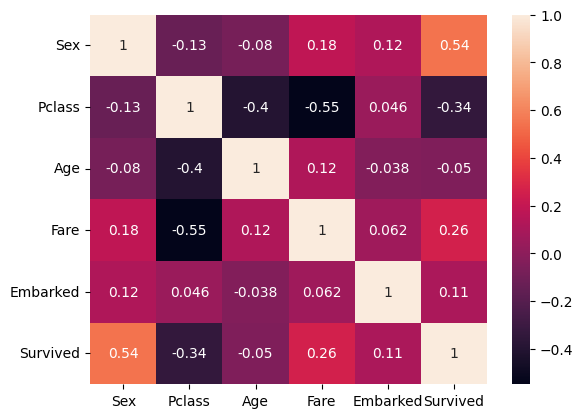

In [9]:
#Crea una matriz de correlación
corr = df_titanic.corr()
# Crea un mapa de calor con la matriz de correlación
sns.heatmap(corr, annot=True)
# Muestra el mapa de calor
plt.show()


Podemos observar que la variable "Survived" tiene una alta correlación con la variable "Sex", "Pclass" y "Fare" sobre todo.


### Train/Test dataset

In [10]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Definimos X e y para nuestro conjunto de datos
X = df_titanic.drop('Survived', axis=1)
y = df_titanic['Survived']

# Normalizamos el conjunto de datos
X = preprocessing.StandardScaler().fit(X).transform(X)

# Dividimos nuestro conjunto de datos en tren y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 5) (712,)
Test set: (179, 5) (179,)


### Modelado (Regresión Logística con Scikit-learn)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
# C, regula la función del costo.
# Liblinear, es un algoritmo de optimización basado en la función del coste 
LR


LogisticRegression(C=0.01, solver='liblinear')

In [12]:
# Hacemos la predicción
y_pred = LR.predict(X_test)

# calcular la precisión del modelo de forma rápida
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.8100558659217877


### Evaluamos el modelo viendo diferentes precisiones

Matriz de Confusión:
[[105  14]
 [ 20  40]]


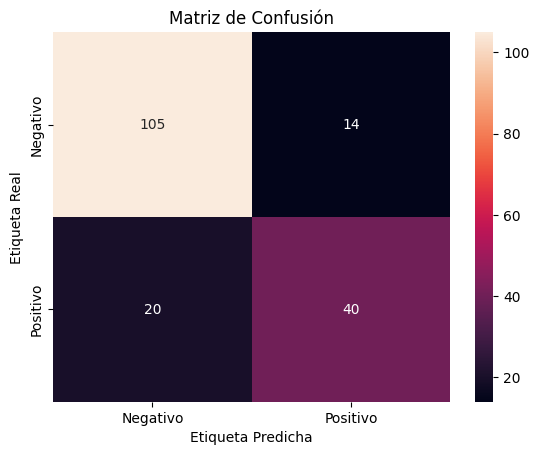

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cnf_matrix)


matrix = pd.DataFrame(cnf_matrix, index = ['Negativo', 'Positivo'],
                  columns = ['Negativo', 'Positivo'])

sns.heatmap(matrix, annot=True, fmt='d')
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

# La matriz de confusión presenta el número de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.


In [14]:
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       119
           1       0.74      0.67      0.70        60

    accuracy                           0.81       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.81      0.81      0.81       179



In [15]:
import joblib

joblib.dump(LR, 'titanic_regresion_logistica.pkl')

# LR_loaded = joblib.load('modelo_regresion_logistica.pkl')  #este código para cargarlo en el futuro

['titanic_regresion_logistica.pkl']